In [2]:
import glob
import netCDF4
import xarray 
import numpy as np
import datetime as dt
import pandas as pd
from pandas import DataFrame

import os
import csv
import numpy as np                  # For doing math
import matplotlib.pyplot as plt     # For plotting
import matplotlib.dates as mdates   # For formatting dates when plotting
import matplotlib.colors as colors  # For truncating colorbars
import matplotlib.style as style
import xarray as xr                 # For dealing with netCDF data
import pandas as pd                 # A quick way to deal with time stamps
import cartopy.crs as ccrs
from polar_stereo_function import circular_polar_plot

In [3]:
file   = 'WACCMX+DART_UVTGPH_2009011900-2009030523.nc'
ds=xr.open_dataset(file)
ds=ds.rename({"nc": "lon","nr":"lat"})
# lon    = ds.variables['LONGITUDE'][...]

In [3]:
ds 

<xarray.Dataset>
Dimensions:     (lat: 96, lon: 144, np: 76, nstep: 120)
Dimensions without coordinates: lat, lon, np, nstep
Data variables:
    YYYYMMDDHH  (nstep) int32 ...
    LONGITUDE   (lon) float32 ...
    LATITUDE    (lat) float32 ...
    PRESSURE    (np) float32 ...
    U           (nstep, np, lat, lon) float32 ...
    V           (nstep, np, lat, lon) float32 ...
    T           (nstep, np, lat, lon) float32 ...
    GPH         (nstep, np, lat, lon) float32 ...
Attributes:
    Description:  Hourly WACCMX-DART U V T GPH for 5 days from 2009011900-200...
    Author:       V. Lynn Harvey, file was created using save_waccm_dart4alon...
    nc:           Number of Longitudes
    nr:           Number of Latitudes
    np:           Number of Pressure Levels
    nstep:        Number of Output Times

In [ ]:
# plt.contourf(ds.GPH[0,0,:,:],cmap='jet')
# plt.xlabel('LONGITUDE INDEX')
# plt.ylabel('LATITUDE INDEX')
# plt.title('surface pressure')

# plt.show()

# data_U = xr.DataArray(ds.U[95,26,:,:], coords=[ds.LATITUDE, ds.LONGITUDE], dims=["lat", "lon"])
# data_V = xr.DataArray(ds.V[0,75,:,:], coords=[ds.LATITUDE, ds.LONGITUDE], dims=["lat", "lon"])
# wind_speed = np.sqrt(np.power(data_U,2)+np.power(data_V,2))
# data_windSpeed = xr.DataArray(wind_speed, coords=[ds.LATITUDE, ds.LONGITUDE], dims=["lat", "lon"])

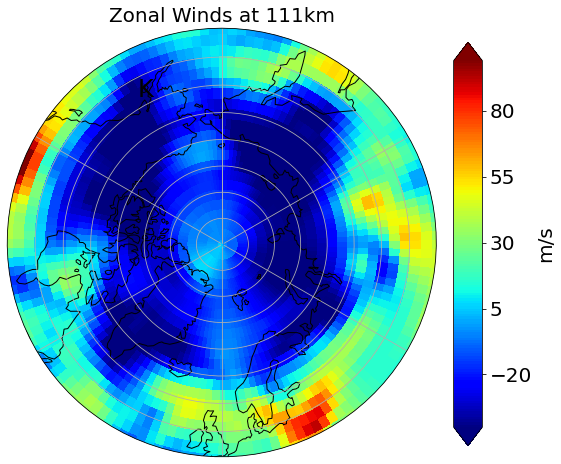

In [14]:
#polar region plot with U winds @ 20009/02/27:23 pressure lvl 26
data_U = xr.DataArray(ds.U[95,29,:,:], coords=[ds.LATITUDE, ds.LONGITUDE], dims=["lat", "lon"])
# circular_polar_plot(data_U, 30, 'jet', 'U Wind Speed-2009/02/27/23:00 at ~ 111km',
#                     cbar_label='M/s', levels_=np.arange(-52,92,1), cbar_levels_=np.arange(-52,92,10))
circular_polar_plot(data_U, 50, 'jet', 'Zonal Winds at 111km',
                    cbar_label='m/s', levels_=np.arange(-40,100,1), cbar_levels_=np.arange(-20, 100, 25),
                   add_text=True, text_lat=-150, text_lon=58, text_string="K", text_size=24 )
plot_label_name = 'Polar U idx 29'
# plt.savefig(plot_label_name+".png")
plt.show()

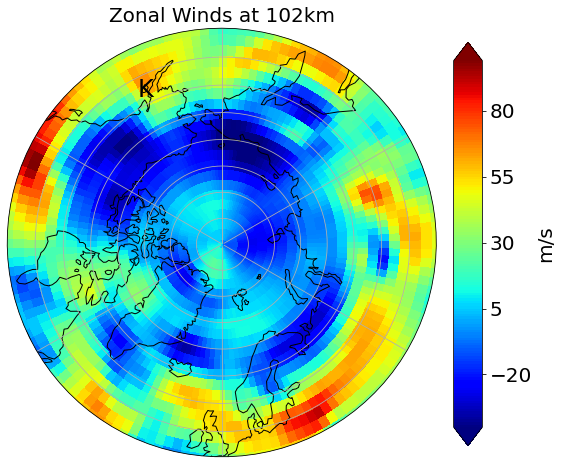

In [13]:
#polar region plot with U winds @ 20009/02/27:23 pressure lvl 37
data_U1 = xr.DataArray(ds.U[95,33,:,:], coords=[ds.LATITUDE, ds.LONGITUDE], dims=["lat", "lon"])
# circular_polar_plot(data_U1, 30, 'jet', 'U Wind Speed-2009/02/27/23:00 at ~ 102km',
#                     cbar_label='M/s', levels_=np.arange(-52,92,1), cbar_levels_=np.arange(-52,92,10))
circular_polar_plot(data_U1, 50, 'jet', 'Zonal Winds at 102km',
                    cbar_label='m/s', levels_=np.arange(-40,100,1), cbar_levels_=np.arange(-20, 100, 25),
                   add_text=True, text_lat=-150, text_lon=58, text_string="K", text_size=24 )

plot_label_name = 'Polar U idx 33'
plt.savefig(plot_label_name+".png",bbox_inches='tight')
plt.show()

In [6]:
#formatting xarray stuff
lon_list=np.abs((152.4-ds.LONGITUDE))
lon_index=(lon_list).argmin() # Kodiak's lat/lon
lat_index=np.abs(75.79-ds.LATITUDE).argmin()

NameError: name 'lon_index' is not defined

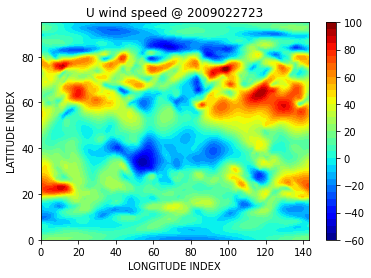

In [25]:
#global map of u winds @ 2009-02-27-23 and pressure lvl idx 34
data_U2 = xr.DataArray(ds.U[95,34,:,:], coords=[ds.LATITUDE, ds.LONGITUDE], dims=["lat", "lon"])
plt.contourf(data_U2,30,cmap='jet')
plt.xlabel('LONGITUDE INDEX')
plt.ylabel('LATITUDE INDEX')
plt.title('U wind speed @ 2009022723')
plt.colorbar()
plt.scatter(lon_index,lat_index,color='black',label='Kodiak')
# plt.scatter(11,80,color='magenta',label='Han')
plt.legend()



plt.show()

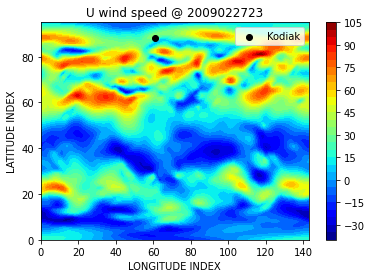

In [9]:
#global map of u winds @ 2009-02-27-23 and pressure lvl idx 37
plt.contourf(data_U1,30,cmap='jet')
plt.xlabel('LONGITUDE INDEX')
plt.ylabel('LATITUDE INDEX')
plt.title('U wind speed @ 2009022723')
plt.colorbar()
plt.scatter(lon_index,lat_index,color='black',label='Kodiak')
plt.legend()



plt.show()

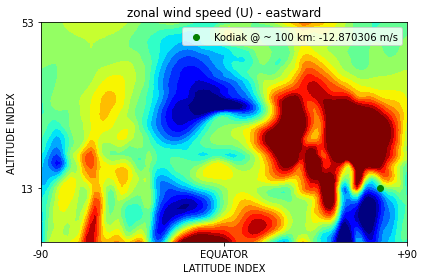

In [10]:
time_index=(np.abs(2009022723-ds.YYYYMMDDHH)).argmin()
altitude_index=34
wind_curtain = ds.U[time_index,21:75,:,lon_index]
plt.contourf(wind_curtain,30,cmap='jet',vmin=-50,vmax=50)
ws=wind_curtain[34-21,lat_index]
plt.scatter(lat_index,altitude_index-21,color='green',label='Kodiak @ ~ 100'+' km: '+str(ws.data)+' m/s')
plt.xticks(ticks=[0,47.5,95],labels=['-90','EQUATOR','+90'])
plt.yticks(ticks=[altitude_index-21,53])
plt.xlabel('LATITUDE INDEX')
plt.ylabel('ALTITUDE INDEX')
plt.title('zonal wind speed (U) - eastward')
plt.legend()
plt.tight_layout()

In [50]:
height = -np.log(ds.PRESSURE[33]*0.001)*8.35

In [51]:
height

<xarray.DataArray 'PRESSURE' ()>
array(102.48865513)

In [38]:
ds.PRESSURE[0]

<xarray.DataArray 'PRESSURE' ()>
array(1.20882e-06, dtype=float32)